In [206]:
import sys 
import os 
from os import path

RESULTS_DIR = '../experiments/results'
GRAPHICS_DIR = '../experiments/results/graphics'

####
# Tenemos que hacer esto por como estan definidos los packages del tp tlengrep
# Si no se ejecuta desde telengrep rompe la ejecucion.
# Lo que hacemos es correr la notebook seteando el "working directory" de python
# como si corriera desde /tlengrep
###
def hack_path_enviroment():
    sys.path.insert(0, "..")
    #os.getcwd()
    os.chdir('../tlengrep/')
    #os.getcwd()


def init_folders():
    if path.exists(f'{RESULTS_DIR}') == False:
        os.mkdir(f'{RESULTS_DIR}')

    if path.exists(f'{GRAPHICS_DIR}') == False:
        os.mkdir(f'{GRAPHICS_DIR}')



In [207]:
hack_path_enviroment()
init_folders()

In [208]:
import tlengrep.regex as regex
l = regex.Lambda()
l.naive_match('a')

False

### Common implementation

In [242]:
import timeit as ti 

EXPERIMENT_RUNS = 100

def calculate_time(execution):
    ## Calculate regular expression time 
    times = ti.repeat(execution, number=1, repeat=EXPERIMENT_RUNS)
    #time = (time / EXPERIMENT_RUNS) * 1000
    time = min(times) * 1000
    
    return time

def time_regular_expression(reg_exp_dict, instances, verbose=1, calculate_naive=True):

    results = {}
    results['instance'] = instances 
    time_results = []
    results[f'{reg_exp_dict["name"]} - avg time (ms)'] = time_results
    naive_time_results = []

    if calculate_naive:
      results[f'{reg_exp_dict["name"]} - naive - avg time (ms)'] = naive_time_results

    reg_exp = reg_exp_dict['regex']
    if verbose >= 1:
        print(f'Timing regular expression for {len(instances)} instances with {EXPERIMENT_RUNS} experiment runs')

    for idx, instance in enumerate(instances):
        if verbose >= 2:
            print(f'Running experiment {idx} ...')
        
        ## Calculate regular expression time 
        execution = lambda: reg_exp.match(instance)
        time = calculate_time(execution)
        time_results.append(time)

        if verbose >= 2:
            print(f'Regular expression average time {time}')


        if calculate_naive:
          ## Calculate naive regular expression time 
          execution = lambda: reg_exp.naive_match(instance)
          time = calculate_time(execution)
          naive_time_results.append(time)

          if verbose >= 2:
              print(f'Regular expression naive implementation average time {time}')
    

    return results


import pandas as pd 
def execute_cached_metric(file_name, metric_execution, dataframe_builder=None):
  results = None
  df = None
  file_name = f'{RESULTS_DIR}/{file_name}'
  if path.exists(file_name) == False:
    ## Si no hay un .csv ejecutamos la metrica
    results = metric_execution()
    if dataframe_builder != None:
      ## Si se provee un "dataframe_builder" entonces lo usamos para
      ## construir el dataframe
      df = dataframe_builder(results)
    else:
      df = pd.DataFrame(results)
    df = dataframe_builder(results)
    df.to_csv(file_name)
  else:
    ## LOAD dataframe from csv file
    df = pd.read_csv(file_name)

  return df

def execute_cached_experiment(file_name, metric_execution):
  results_df = None
  file_name = f'{RESULTS_DIR}/{file_name}'
  if path.exists(file_name) == False:
    ## Si no hay un .csv ejecutamos la metrica
    results_df = metric_execution()
    results_df.to_csv(file_name, index=False)
  else:
    ## LOAD dataframe from csv file
    results_df = pd.read_csv(file_name)

  return results_df

### Experiments 1

#### Implementations

In [210]:
TOTAL_INSTANCES = 10
SIZE_STEP = 100
instances = ["ab" * (i*SIZE_STEP) for i in range(1, TOTAL_INSTANCES + 1)]

def generate_regular_expression_1():
    return regex.Star(regex.Concat(regex.Char('a'), regex.Char('b')))

reg_ex_dict = {
    're_1': {
        'name': 're_1',
        'regex': generate_regular_expression_1(),
        'regex_str': '(ab)*'}
}
    

In [211]:
def execute_experiment_1():
    results = time_regular_expression(reg_ex_dict['re_1'], instances, verbose=2)
    df = pd.DataFrame(results)
    df['instance size'] = df['instance'].apply(lambda x: len(x))
    df = df.drop(['instance'], axis=1)
    #df = df.set_index('instance size')
    return df

#### Metrics

In [212]:
exp1_df = execute_cached_experiment('exp1.csv', execute_experiment_1)
exp1_df = exp1_df.set_index('instance size')
exp1_df

,re_1 - avg time (ms),re_1 - naive - avg time (ms)
instance size,,
200,0.184956,1.704985
400,0.218266,6.546786
600,0.151936,15.246683
800,0.295718,27.314634
1000,0.190382,43.910868
1200,0.210591,63.644856
1400,0.296013,89.249360
1600,0.243543,119.835171
1800,0.268700,151.055308


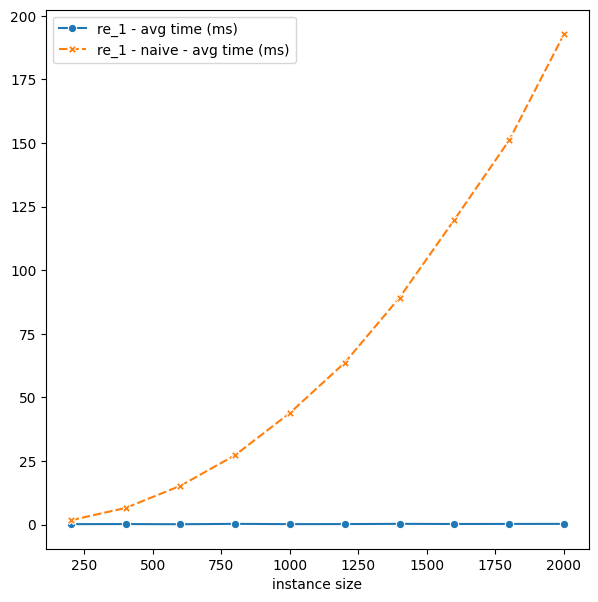

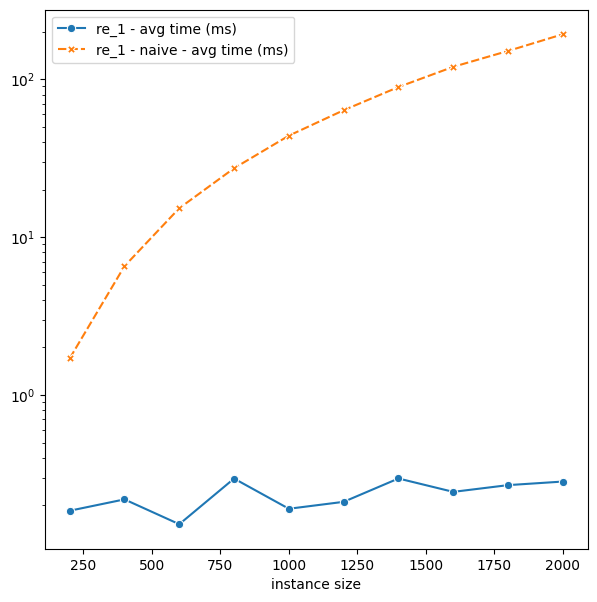

In [213]:
import seaborn as sns

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp1_df, ax=axes,markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp1_re_1_times.png')

fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp1_df, ax=axes, markers=True)
axes.set_yscale('log')
plt.savefig(f'{GRAPHICS_DIR}/exp1_re_1_log_times.png')



In [214]:
exp1_aux_df = exp1_df.copy()
exp1_aux_df = exp1_aux_df.reset_index()
exp1_aux_df['re_1 - avg time (ms) / n'] = 100 * (exp1_aux_df['re_1 - avg time (ms)'] / exp1_aux_df['instance size'])
exp1_aux_df['re_1 - naive - avg time (ms) / n^2'] = 50000 * (exp1_aux_df['re_1 - naive - avg time (ms)'] / exp1_aux_df['instance size']**2)
exp1_aux_df = exp1_aux_df.set_index('instance size')
exp1_aux_df

,re_1 - avg time (ms),re_1 - naive - avg time (ms),re_1 - avg time (ms) / n,re_1 - naive - avg time (ms) / n^2
instance size,,,,
200,0.184956,1.704985,0.092478,2.131232
400,0.218266,6.546786,0.054567,2.045871
600,0.151936,15.246683,0.025323,2.117595
800,0.295718,27.314634,0.036965,2.133956
1000,0.190382,43.910868,0.019038,2.195543
1200,0.210591,63.644856,0.017549,2.209891
1400,0.296013,89.249360,0.021144,2.276769
1600,0.243543,119.835171,0.015221,2.340531
1800,0.268700,151.055308,0.014928,2.331100


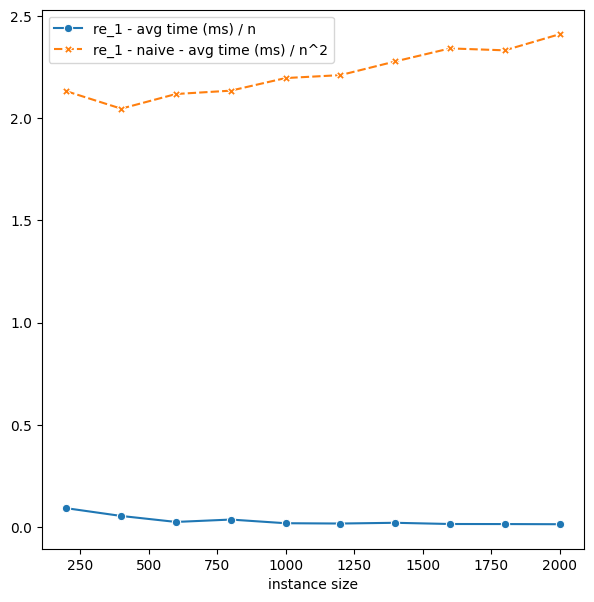

In [215]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp1_aux_df[['re_1 - avg time (ms) / n', 're_1 - naive - avg time (ms) / n^2']], ax=axes, markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp1_re_1_times_complexity_n2.png')

#### Experiments 1.2

In [216]:
def generate_regular_expression_2():
    return regex.Star(regex.Star(regex.Star(regex.Concat(regex.Char('a'), regex.Char('b')))))

reg_ex_dict['re_2'] = {
         'name': 're_2',
        'regex': generate_regular_expression_2(),
        'regex_str': '(((ab)*)*)*'}

def execute_experiment_2():
    results = time_regular_expression(reg_ex_dict['re_2'], instances, verbose=2)
    df = pd.DataFrame(results)
    df['instance size'] = df['instance'].apply(lambda x: len(x))
    df = df.drop(['instance'], axis=1)
    df = df.set_index('instance size')
    return df
    

In [217]:
exp1_2_df = execute_cached_experiment('exp1_2.csv', execute_experiment_2)
exp1_2_df = exp1_2_df.set_index('instance size')
exp1_2_df

,re_2 - avg time (ms),re_2 - naive - avg time (ms)
instance size,,
200,0.127042,3.085409
400,0.242048,6.542693
600,0.159218,15.565666
800,0.177970,27.585412
1000,0.196614,45.008085
1200,0.228037,66.101291
1400,0.235024,90.926550
1600,0.252922,122.839616
1800,0.285864,161.717003


### Experiments 2

#### Implementations

In [218]:
import string 


# Genera una expresión regular donde una cadena de exto es recorrida k veces hasta el ultimo caracter
# Para esto seleccionamos k caracteres {c1,...ck} y obtenemos las clausuras de kleene {c1*, ..., ck*}.
# Realizamos la concatenación en una expresión regular R1 = c1*c2*...ck*
# Luego tomamos k caracteres distintos {d1,...dk} a los que no les realizamos la clasura y construimos la expresión.
# regular R = (R1 d1 | R1 d2 | R1 d3 | ... | R1 dk)
# para esto hacemos una "suma" de distintas clausuras de kleene para cada caracter 
# Ahora si construimos un string como "R1 dk" la expresión regular debera recorrer 
# cada caso fallando unicamente en el último caracter y
def generate_regulat_expression_2(size=3):
    assert(size*2 <= 52)
    all_letters = list(string.ascii_letters)
    #print(len(all_letters))
    result_alphabet = []

    ## Primero generamos a*, b*, ... hasta size
    closures = []
    for idx in range (0, size):
        letter = all_letters[idx]
        re = regex.Star(regex.Char(letter))
        closures.append(re)
        result_alphabet.append(letter)

    ## Nos con los siguientes k characteres
    sub_regexes = []
    for i in range(0, size):
        idx = (size+i)
        letter = all_letters[idx]
        re = regex.Concat(closures[i], regex.Char(letter))
        sub_regexes.append(re)
        result_alphabet.append(letter)

    ## Ahora generamos la suma de todos los sub_regexes para
    ## construir R = (R1 d1 | ... | R1 dk)
    final_regex = None
    for sub_re in sub_regexes:
        if final_regex is None:
            final_regex = sub_re

        else:
            final_regex = regex.Union(final_regex, sub_re)


    return result_alphabet, final_regex




generate_regulat_expression_2()

(['a', 'b', 'c', 'd', 'e', 'f'], <tlengrep.regex.Union at 0x7f3eeb2d08e0>)

In [219]:
import random 

EXP2_INSTANCE_SIZES = [5,10,15,20,25]

def generate_exp2_reg_exe_dict():
    exp2_reg_ex_dict = {}    
    for i in EXP2_INSTANCE_SIZES:
        re_dict = {}
        alph, re = generate_regulat_expression_2(size=i)
        re_dict['name'] = f'exp2_re_{i}'
        re_dict['alph'] = alph 
        re_dict['regex'] = re 
        exp2_reg_ex_dict[re_dict['name']] = re_dict

    return exp2_reg_ex_dict

def generate_exp2_instances(exp2_reg_ex_dict):
    exp2_instances_dict = {}

    def generate_instances_for_re_2(alphabet, total_instances=10, size_step=100):
        usable_alph = alphabet.copy()
        last_character = usable_alph.pop()
        instances = [  ''.join(random.choices(usable_alph, k=(i*size_step)) + [last_character] ) for i in range(1, total_instances + 1)]
        return instances

    for i in EXP2_INSTANCE_SIZES:
        inst_dict = {}
        inst_dict['name'] = f'exp2_inst_{i}'
        alph = exp2_reg_ex_dict[f'exp2_re_{i}']['alph']
        inst_dict['instances'] = generate_instances_for_re_2(alph)
        exp2_instances_dict[inst_dict['name']] = inst_dict

    return exp2_instances_dict



In [220]:
def execute_experiment_2():
    exp2_results = []
    exp2_reg_ex_dict = generate_exp2_reg_exe_dict()
    exp2_instances_dict = generate_exp2_instances(exp2_reg_ex_dict)
    
    for i in EXP2_INSTANCE_SIZES:
        reg_exp_dict = exp2_reg_ex_dict[f'exp2_re_{i}']
        instances_dict = exp2_instances_dict[f'exp2_inst_{i}']
        print(reg_exp_dict)
        results = time_regular_expression(reg_exp_dict, instances_dict['instances'], verbose=2)
        exp2_results.append(results)

    exp2_times_dict = {}
    for exp2_result in exp2_results:
        for key, val in exp2_result.items():
            if 'instance' in key:
                exp2_times_dict['instance size'] = [len(inst) for inst in val]
            if 'time' in key:
                exp2_times_dict[key] = val

    exp2_times_df = pd.DataFrame(exp2_times_dict)
    #exp2_times_df = exp2_times_df.set_index('instance size')
    return exp2_times_df
    
        

#### Metrics

In [221]:
exp2_df = execute_cached_experiment('exp2.csv', execute_experiment_2)
exp2_df = exp2_df.set_index('instance size')

In [222]:
filtered_columns = list(filter((lambda col: 'naive' in col ),exp2_df.columns))
exp2_naive_times_df = exp2_df[filtered_columns]
exp2_times_df = exp2_df.drop(exp2_naive_times_df.columns, axis=1)
exp2_times_df

,exp2_re_5 - avg time (ms),exp2_re_10 - avg time (ms),exp2_re_15 - avg time (ms),exp2_re_20 - avg time (ms),exp2_re_25 - avg time (ms)
instance size,,,,,
101,1.076882,5.051792,14.691558,32.566242,62.255332
201,1.094156,5.148373,14.741216,32.830748,61.556697
301,1.260769,5.050442,14.831269,34.190136,61.257432
401,1.097717,5.090580,14.796395,34.018097,63.123522
501,1.104991,5.015938,14.892291,33.426595,62.856096
601,2.071921,5.018317,14.887794,33.725953,62.964750
701,1.127326,5.074165,14.832574,33.866514,64.899928
801,1.134909,5.150830,14.748915,32.958978,63.015950
901,1.149486,5.250240,15.017089,32.809915,62.816642


In [223]:
exp2_naive_times_df

,exp2_re_5 - naive - avg time (ms),exp2_re_10 - naive - avg time (ms),exp2_re_15 - naive - avg time (ms),exp2_re_20 - naive - avg time (ms),exp2_re_25 - naive - avg time (ms)
instance size,,,,,
101,4.442129,8.704773,13.124083,17.661712,21.975557
201,17.886868,37.742134,54.310221,68.050300,84.229073
301,40.463179,78.246433,116.947772,163.416360,196.584908
401,70.748593,138.150804,203.580044,288.787290,358.252762
501,113.519860,218.124897,371.542462,433.184463,579.073230
601,194.945716,349.476278,504.477171,670.164737,781.486288
701,266.509549,560.342101,711.530450,935.285358,1110.983723
801,352.331674,572.239671,878.983859,1248.443565,1493.639805
901,452.527766,728.887939,1101.150876,1561.563008,1851.736118


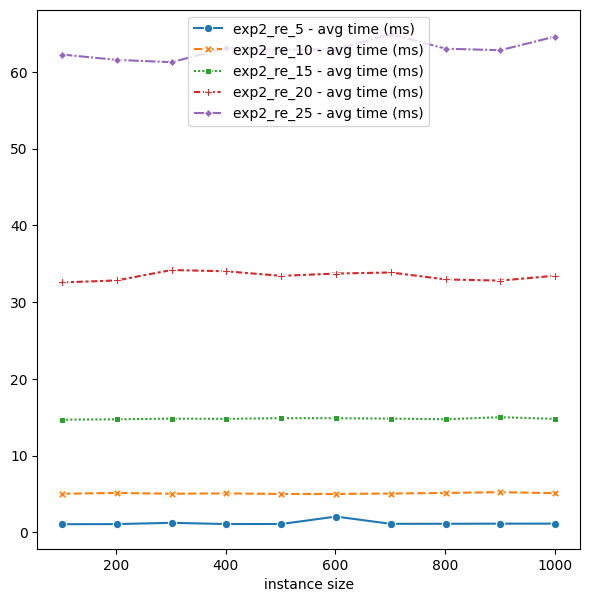

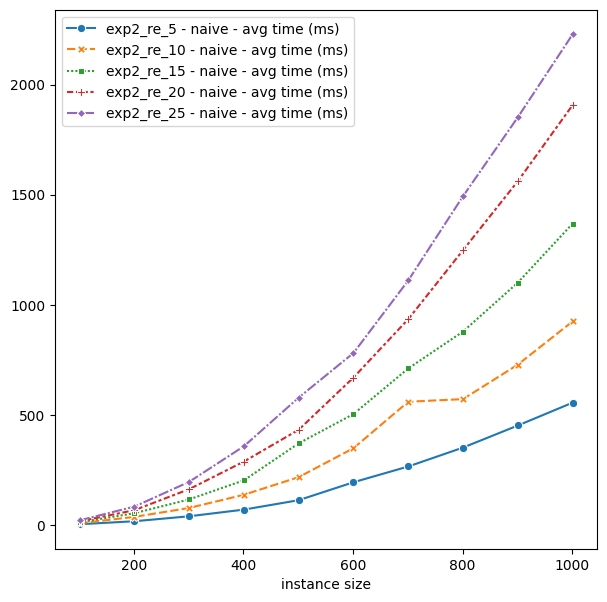

In [224]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp2_times_df, ax=axes, markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp2_times.png')


fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp2_naive_times_df, ax=axes,markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp2_naive_times.png')

### Experiments 3

In [225]:
TOTAL_INSTANCES = 10
SIZE_STEP = 10
exp3_instances = ["cd" * (i*SIZE_STEP) for i in range(1, TOTAL_INSTANCES + 1)]

In [226]:
def generate_regular_exp3_re1():
    return regex.Star(regex.Concat(regex.Char('a'), regex.Char('b')))

def generate_regular_exp3_re2():
    return regex.Star(regex.Star(regex.Concat(regex.Char('a'), regex.Char('b'))))

def generate_regular_exp3_re3():
    return regex.Star(regex.Star(regex.Star(regex.Concat(regex.Char('a'), regex.Char('b')))))


exp3_regex_dict= { 
    'exp3_re1': {
         'name': 'exp3_re1',
        'regex': generate_regular_exp3_re1(),
        'regex_str': '(ab)*'},
    'exp3_re2': {
         'name': 'exp3_re2',
        'regex': generate_regular_exp3_re2(),
        'regex_str': '((ab)*)*'},
    'exp3_re3': {
         'name': 'exp3_re3',
        'regex': generate_regular_exp3_re3(),
        'regex_str': '(((ab)*)*)*'}
}

In [244]:
def execute_experiment_3(regex_dict, instances, calculate_naive=True):
    results = time_regular_expression(regex_dict, instances, verbose=2, calculate_naive=calculate_naive)
    df = pd.DataFrame(results)
    df['instance size'] = df['instance'].apply(lambda x: len(x))
    df = df.drop(['instance'], axis=1)
    #df = df.set_index('instance size')
    return df


In [245]:
execute_exp3_1 = lambda : execute_experiment_3(exp3_regex_dict['exp3_re1'], exp3_instances)
execute_exp3_2 = lambda : execute_experiment_3(exp3_regex_dict['exp3_re2'], exp3_instances)
execute_exp3_3 = lambda : execute_experiment_3(exp3_regex_dict['exp3_re3'], exp3_instances[:6])


exp3_re1_df = execute_cached_experiment('exp3_re1.csv', execute_exp3_1)
exp3_re1_df = exp3_re1_df.set_index('instance size')

exp3_re2_df = execute_cached_experiment('exp3_re2.csv', execute_exp3_2)
exp3_re2_df = exp3_re2_df.set_index('instance size')

exp3_re3_df = execute_cached_experiment('exp3_re3.csv', execute_exp3_3)
exp3_re3_df = exp3_re3_df.set_index('instance size')


#### Experiment 3 - Naive

In [246]:
exp3_naive_times_df = exp3_re1_df.copy()
exp3_naive_times_df = exp3_naive_times_df.drop('exp3_re1 - avg time (ms)', axis=1)
exp3_naive_times_df['exp3_re2 - naive - avg time (ms)'] = exp3_re2_df['exp3_re2 - naive - avg time (ms)']
exp3_naive_times_df['exp3_re3 - naive - avg time (ms)'] = exp3_re3_df['exp3_re3 - naive - avg time (ms)']
exp3_naive_times_df

,exp3_re1 - naive - avg time (ms),exp3_re2 - naive - avg time (ms),exp3_re3 - naive - avg time (ms)
instance size,,,
20,0.043621,0.386990,3.067608
40,0.143614,2.288634,31.080352
60,0.298542,6.856012,129.312600
80,0.516143,15.560766,383.692687
100,0.785813,30.322215,877.012978
120,1.129125,50.212889,1734.149497
140,1.495648,78.466407,NaN
160,1.933074,116.132682,NaN
180,2.454219,162.839434,NaN


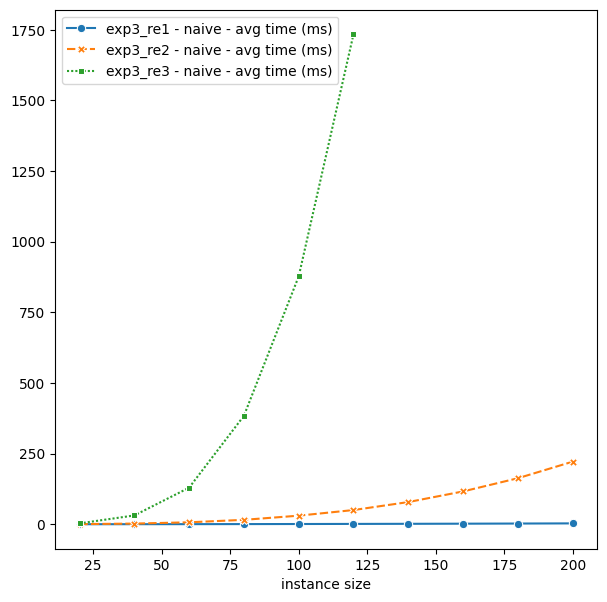

In [247]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp3_naive_times_df, ax=axes, markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp3_times.png')


In [248]:
import numpy as np
exp3_naive_complexity_df = exp3_naive_times_df.copy()
exp3_nc_df = exp3_naive_complexity_df.reset_index()

complexity = ((exp3_nc_df['instance size'] ** (2)) )
exp3_nc_df['exp3_re1 - naive - avg time (ms) / n^2'] = 2000 * (exp3_nc_df['exp3_re1 - naive - avg time (ms)'] / complexity)
complexity = ((exp3_nc_df['instance size']** (3)) )
exp3_nc_df['exp3_re2 - naive - avg time (ms) / n^3'] = 3000 * (exp3_nc_df['exp3_re2 - naive - avg time (ms)'] / complexity)
complexity = ((exp3_nc_df['instance size']** (4)) )
exp3_nc_df['exp3_re3 - naive - avg time (ms) / n^4'] = 10000 * (exp3_nc_df['exp3_re3 - naive - avg time (ms)'] / complexity)

exp3_nc_df = exp3_nc_df.set_index('instance size')
exp3_naive_complexity_df = exp3_nc_df.drop(['exp3_re1 - naive - avg time (ms)', 'exp3_re2 - naive - avg time (ms)', 'exp3_re3 - naive - avg time (ms)'], axis=1)

exp3_naive_complexity_df.rename(columns={
    'exp3_re1 - naive - avg time (ms) / n^2': 'k1 * exp3_re1 - naive - avg time (ms) / n^2',
    'exp3_re2 - naive - avg time (ms) / n^3': 'k2 * exp3_re1 - naive - avg time (ms) / n^3',
    'exp3_re3 - naive - avg time (ms) / n^4': 'k3 * exp3_re1 - naive - avg time (ms) / n^4'
}, inplace=True)

exp3_naive_complexity_df

,k1 * exp3_re1 - naive - avg time (ms) / n^2,k2 * exp3_re1 - naive - avg time (ms) / n^3,k3 * exp3_re1 - naive - avg time (ms) / n^4
instance size,,,
20,0.218106,0.145121,0.191725
40,0.179518,0.107280,0.121408
60,0.165857,0.095222,0.099778
80,0.161295,0.091176,0.093675
100,0.157163,0.090967,0.087701
120,0.156823,0.087175,0.083630
140,0.152617,0.085787,NaN
160,0.151021,0.085058,NaN
180,0.151495,0.083765,NaN


[(0.0, 0.6)]

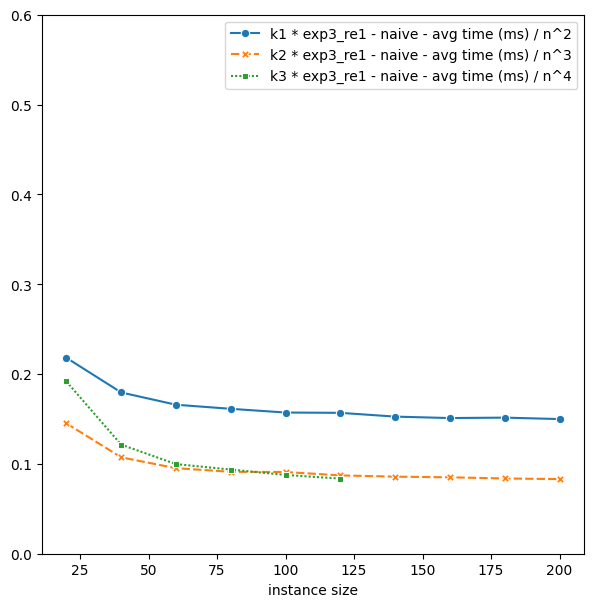

In [249]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp3_naive_complexity_df, ax=axes, markers=True)
axes.set(ylim=(0.0, 0.6))
plt.savefig(f'{GRAPHICS_DIR}/exp3_1_complexity.png')


#### Experiment 3 - Solution

In [250]:
execute_exp3_sol_3 = lambda : execute_experiment_3(exp3_regex_dict['exp3_re3'], exp3_instances, calculate_naive=False)
exp3_re3_sol_df = execute_cached_experiment('exp3_re3_sol.csv', execute_exp3_sol_3)
exp3_re3_sol_df = exp3_re3_sol_df.set_index('instance size')

In [251]:
exp3_times_df = exp3_re1_df.copy()
exp3_times_df = exp3_times_df.drop('exp3_re1 - naive - avg time (ms)', axis=1)
exp3_times_df['exp3_re2 - avg time (ms)'] = exp3_re2_df['exp3_re2 - avg time (ms)']
exp3_times_df['exp3_re3 - avg time (ms)'] = exp3_re3_sol_df['exp3_re3 - avg time (ms)']
exp3_times_df

,exp3_re1 - avg time (ms),exp3_re2 - avg time (ms),exp3_re3 - avg time (ms)
instance size,,,
20,0.096721,0.096340,0.098559
40,0.095612,0.097522,0.097824
60,0.097150,0.096640,0.098319
80,0.094025,0.096459,0.098505
100,0.093858,0.095828,0.097886
120,0.093824,0.096968,0.098292
140,0.093659,0.098030,0.097510
160,0.094259,0.104574,0.102637
180,0.095763,0.097805,0.098864


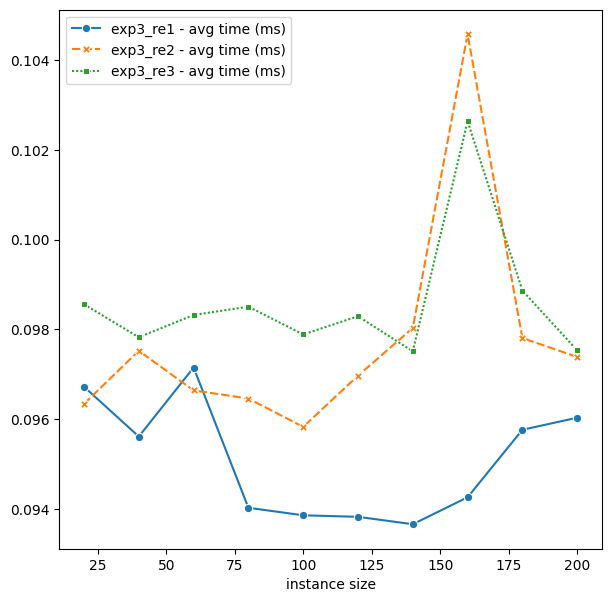

In [252]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=exp3_times_df, ax=axes, markers=True)
plt.savefig(f'{GRAPHICS_DIR}/exp3_times.png')
